**Importing the Libraries**

In [52]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

**Creating our own data**

In [53]:
# Setting the seed to one static value to able to reproduce the results by initializing the same values each run
torch.manual_seed(3)

class Data(Dataset):
  """
  Creates our own custom/synthetic data points with one feature of each x and y.
  """
  def __init__(self):
    """
    Initializes x and y data points. Each has one feature, though having the shape of 2 dimensions associationg with a matrix.
    initializes the length of the datasets.
    """
    self.x = torch.arange(1, 5, 0.05).view(-1, 1)
    self.y = self.x + torch.randn(self.x.shape[0]).view(-1, 1) ** 3
    self.length = self.x.shape[0]

  def __getitem__(self, index):
    """
    Gets the data from the x and y sets by index with respect to their position.

    Returns:
        (tuple): tuple of x and y data by index
    """
    return self.x[index], self.y[index]

  def __len__(self):
    """
    Gets the length of the dataset

    Returns:
        (int): value of the length of the dataset
    """
    return self.length

# Instantiating the object of the Data class
dataset = Data()

# Giving the batch_size that will be used during the training of the model
batch_size = 4

# Defining the dataloder for the training. This is essential as it works as the data generator saving the computer memory space
train_dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True) # shuffle -> randomly selects the batch (by size given) from the whole data population

**Visualizing the data that we created**

[]

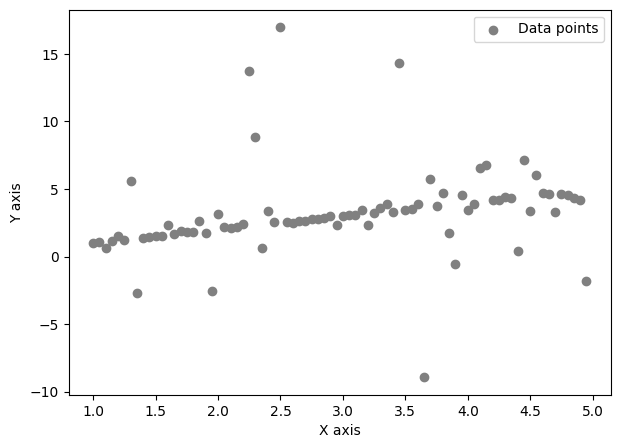

In [54]:
"""Displays the created data points. Sample X and Target Y """

fig1 = plt.figure(figsize=(7, 5)) # Initializing a figure
ax1 = plt.subplot(1, 1, 1) # Putting axes onto that figure
ax1.scatter(dataset.x.detach().tolist(), dataset.y.detach().tolist(), marker='o', color='gray') # Drawing the graph type on the axes defined previously
ax1.set_xlabel('X axis') # Naming the x axis
ax1.set_ylabel('Y axis') # Naming the y axis
ax1.legend(['Data points']) # Naming the legend
plt.plot() # telling to visualize

**Defining the Custom Module**

In [55]:
class Linear_Regression_PyTorch(nn.Module):
  """
  Linear Regression Model
  """
  def __init__(self, input_size, output_size):
    """
    Initializes one linear layer.

    Args:
        input_size (integer): Number of features that a neuron (linear model) will have.
        output_size (integer): Number of neurons (linear functions) that the layer will have.
    """
    super(Linear_Regression_PyTorch, self).__init__()
    self.linear = nn.Linear(in_features=input_size, out_features=output_size)

  def forward(self, x):
    """
    Fits an input into the linear model and returns the result of the model prediction.

    Args:
        x (tensor): Input to the linear model
    Returns:
        (tensor): Result of the model prediction
    """
    return self.linear(x)

model = Linear_Regression_PyTorch(1, 1)

**Defining Cost Function, optimizer with the learning rate**

In [56]:
"""Defining the hyperparamets, cost function and gradient descent algorithm"""

# Step of learning - update step
learning_rate = 0.001

# Cost function
criterion = nn.MSELoss()

# Updater - uses stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Training Loop**

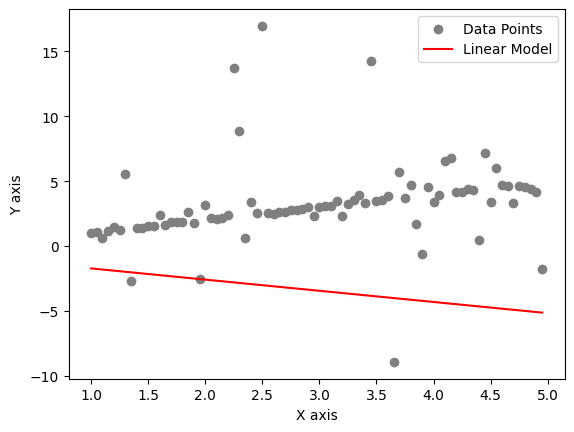

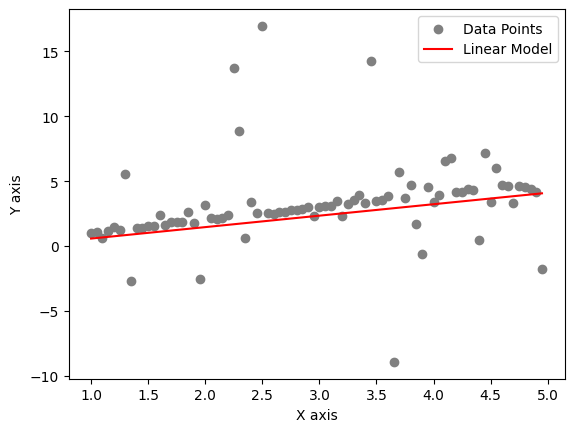

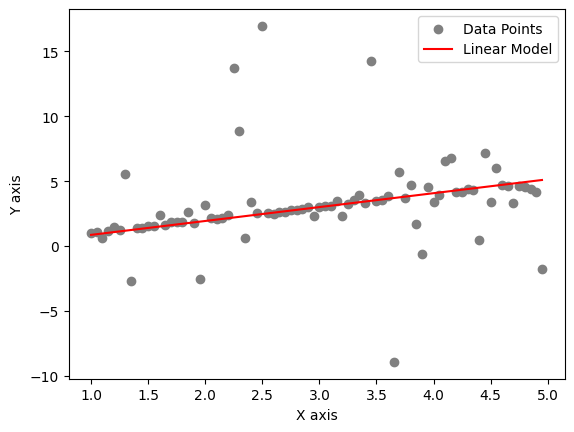

In [57]:
def Train(model, dataset, train_dataloader, criterion, optimizer, epochs, COST, LOSS):
  """
  Trains the model updating the parameters on each iteration.
  """
  for epoch in range(epochs):
    # visualization of linear function fitting each time better to the datapoints
    if epoch == 0 or epoch % 5 == 0:
      plt.scatter(dataset.x.detach().tolist(), dataset.y.detach().tolist(), marker='o', color='gray')
      plt.plot(dataset.x.detach().tolist(), model(dataset.x).detach().tolist(), linestyle='-', color='red')
      plt.xlabel('X axis')
      plt.ylabel('Y axis')
      plt.legend(['Data Points', 'Linear Model'])
      plt.show()

    # training
    for x, y in train_dataloader:
      yhat = model(x)
      loss = criterion(yhat, y)
      LOSS += loss.item()
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    COST.append(LOSS)
    LOSS = 0

  return model

# Arguments for the model
epochs = 11
COST = []
LOSS = 0
model = Train(model, dataset, train_dataloader, criterion, optimizer, epochs, COST, LOSS)

**Learning Curve**

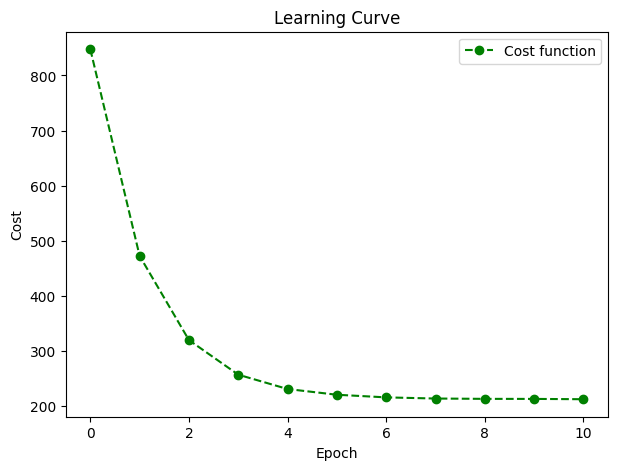

In [58]:
"""Cost function convergence to zero"""

fig2 = plt.figure(figsize=(7, 5))
ax2 = plt.subplot(1, 1, 1)
ax2.plot(range(epochs), COST, marker='o', linestyle='--', color='green')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Cost')
ax2.set_title('Learning Curve')
ax2.legend(['Cost function'])
plt.show()